## 32x3

### 1000x50

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(Domain_data['label'].nunique(), activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           7000      
                                                                 
 conv1d (Conv1D)             (None, 48, 32)            9632      
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 32)            3104      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 250)               8250      
                                                        

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,epochs=50, verbose=True,validation_data=(X_test, y_test),batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/50
1622/1622 [==============================] - 28s 10ms/step - loss: 1.3044 - accuracy: 0.6357 - val_loss: 0.5485 - val_accuracy: 0.8698
Epoch 2/50
1622/1622 [==============================] - 15s 9ms/step - loss: 0.8534 - accuracy: 0.7502 - val_loss: 0.4666 - val_accuracy: 0.8898
Epoch 3/50
1622/1622 [==============================] - 15s 9ms/step - loss: 0.7638 - accuracy: 0.7752 - val_loss: 0.4728 - val_accuracy: 0.8874
Epoch 4/50
1622/1622 [==============================] - 14s 9ms/step - loss: 0.7101 - accuracy: 0.7905 - val_loss: 0.4542 - val_accuracy: 0.8919
Epoch 5/50
1622/1622 [==============================] - 15s 9ms/step - loss: 0.6712 - accuracy: 0.8022 - val_loss: 0.4519 - val_accuracy: 0.8938
Epoch 6/50
1622/1622 [==============================] - 14s 9ms/step - loss: 0.6421 - accuracy: 0.8101 - val_loss: 0.4634 - val_accuracy: 0.8859
Epoch 7/50
1622/1622 [==============================] - 14s 9ms/step - loss: 0.6189 - accuracy: 0.8165 - val_loss: 0.4124 - val_a

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.8625
Testing Accuracy:  0.8847


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 17.771240949630737 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.50      1.00      0.67         5
           2       0.85      1.00      0.92        28
           3       0.99      1.00      1.00     94137
           4       0.04      0.27      0.07       210
           5       0.15      0.40      0.22       197
           6       0.01      0.07      0.02        89
           7       0.50      1.00      0.67         1
           8       0.01      0.02      0.01       214
           9       0.03      0.06      0.04       151
          10       0.88      0.90      0.89       218
          11       0.88      0.90      0.89    100071
          12       0.67      0.85      0.75        94
          13       0.18      0.61      0.28        44
          14       0.00      0.00      0.00      5982
          15       0.00      0.02      0.01        51
          16       0.03      0.11      0.05        63
          17       0.79    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


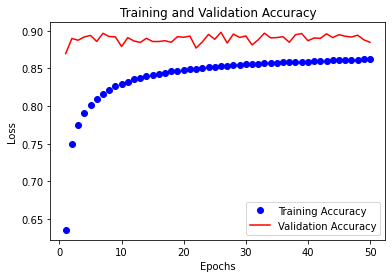

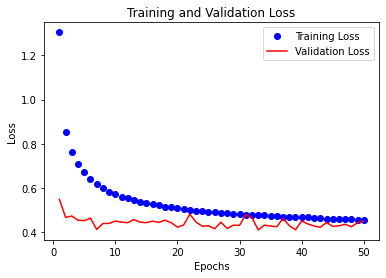

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/|Mcnnmodel_2x32x3,1000x50.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://646b6f0c-246a-4785-9946-a1a24d71224e/assets


### 1000x100

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(Domain_data['label'].nunique(), activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 32)            9632      
                                                                 
 conv1d_3 (Conv1D)           (None, 46, 32)            3104      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 250)               8250      
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,epochs=100, verbose=True,validation_data=(X_test, y_test),batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/100
1622/1622 [==============================] - 15s 9ms/step - loss: 1.3007 - accuracy: 0.6358 - val_loss: 0.5983 - val_accuracy: 0.8521
Epoch 2/100
1622/1622 [==============================] - 14s 9ms/step - loss: 0.8533 - accuracy: 0.7498 - val_loss: 0.4777 - val_accuracy: 0.8840
Epoch 3/100
1622/1622 [==============================] - 14s 9ms/step - loss: 0.7690 - accuracy: 0.7739 - val_loss: 0.4629 - val_accuracy: 0.8887
Epoch 4/100
1622/1622 [==============================] - 14s 9ms/step - loss: 0.7174 - accuracy: 0.7883 - val_loss: 0.4775 - val_accuracy: 0.8783
Epoch 5/100
1622/1622 [==============================] - 14s 9ms/step - loss: 0.6818 - accuracy: 0.7986 - val_loss: 0.4774 - val_accuracy: 0.8760
Epoch 6/100
1622/1622 [==============================] - 15s 9ms/step - loss: 0.6547 - accuracy: 0.8062 - val_loss: 0.4955 - val_accuracy: 0.8785
Epoch 7/100
1622/1622 [==============================] - 15s 9ms/step - loss: 0.6327 - accuracy: 0.8124 - val_loss: 0.4595 -

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.8689
Testing Accuracy:  0.8983


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 17.546791315078735 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.62      1.00      0.77         5
           2       0.80      1.00      0.89        28
           3       0.99      1.00      1.00     94137
           4       0.05      0.29      0.09       210
           5       0.17      0.39      0.24       197
           6       0.02      0.12      0.03        89
           7       0.00      0.00      0.00         1
           8       0.01      0.05      0.01       214
           9       0.03      0.07      0.04       151
          10       0.90      0.87      0.89       218
          11       0.89      0.89      0.89    100071
          12       0.68      0.76      0.72        94
          13       0.17      0.61      0.27        44
          14       0.00      0.00      0.00      5982
          15       0.01      0.04      0.01        51
          16       0.04      0.13      0.06        63
          17       0.88    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


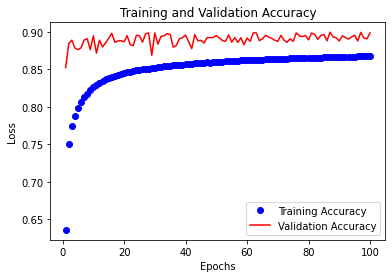

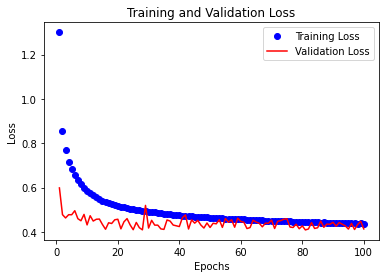

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/|Mcnnmodel_2x32x3,1000x100.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://201aeac6-9a65-4a88-bedb-1ce16b78871f/assets


INFO:tensorflow:Assets written to: ram://201aeac6-9a65-4a88-bedb-1ce16b78871f/assets


### 64x3

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(64, 3, activation='relu'))
textcnnmodel.add(layers.Conv1D(64, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(Domain_data['label'].nunique(), activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_4 (Conv1D)           (None, 48, 64)            19264     
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 250)               16250     
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,epochs=100, verbose=True,validation_data=(X_test, y_test),batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/100
1622/1622 [==============================] - 21s 12ms/step - loss: 1.1594 - accuracy: 0.6758 - val_loss: 0.4404 - val_accuracy: 0.8952
Epoch 2/100
1622/1622 [==============================] - 20s 12ms/step - loss: 0.6859 - accuracy: 0.8000 - val_loss: 0.4259 - val_accuracy: 0.8945
Epoch 3/100
1622/1622 [==============================] - 19s 12ms/step - loss: 0.5818 - accuracy: 0.8294 - val_loss: 0.3929 - val_accuracy: 0.9044
Epoch 4/100
1622/1622 [==============================] - 20s 12ms/step - loss: 0.5261 - accuracy: 0.8453 - val_loss: 0.3431 - val_accuracy: 0.9143
Epoch 5/100
1622/1622 [==============================] - 19s 12ms/step - loss: 0.4890 - accuracy: 0.8557 - val_loss: 0.3483 - val_accuracy: 0.9104
Epoch 6/100
1622/1622 [==============================] - 19s 12ms/step - loss: 0.4614 - accuracy: 0.8636 - val_loss: 0.3859 - val_accuracy: 0.9060
Epoch 7/100
1622/1622 [==============================] - 19s 12ms/step - loss: 0.4411 - accuracy: 0.8690 - val_loss: 0

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9225
Testing Accuracy:  0.9206


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 20.565937519073486 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.71      1.00      0.83         5
           2       0.78      1.00      0.88        28
           3       1.00      1.00      1.00     94137
           4       0.06      0.31      0.10       210
           5       0.31      0.49      0.38       197
           6       0.02      0.03      0.02        89
           7       0.00      0.00      0.00         1
           8       0.01      0.01      0.01       214
           9       0.03      0.05      0.04       151
          10       0.90      0.93      0.92       218
          11       0.90      0.92      0.91    100071
          12       0.75      0.72      0.74        94
          13       0.60      0.61      0.61        44
          14       0.00      0.00      0.00      5982
          15       0.01      0.08      0.02        51
          16       0.06      0.13      0.08        63
          17       0.98    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


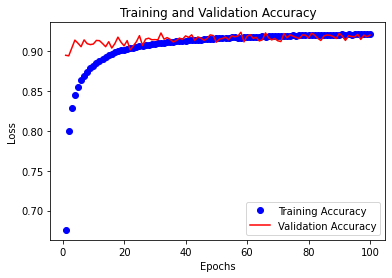

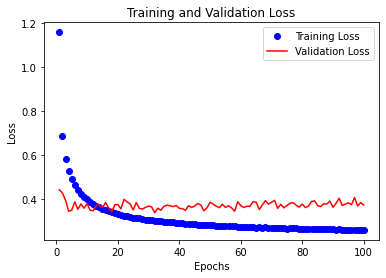

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/|Mcnnmodel_2x64x3,1000x100.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://201a93aa-2f99-4f83-a72f-e812c4b1b191/assets


INFO:tensorflow:Assets written to: ram://201a93aa-2f99-4f83-a72f-e812c4b1b191/assets


### 64x5

## CNN

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(64, 5, activation='relu'))
textcnnmodel.add(layers.Conv1D(64, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(Domain_data['label'].nunique(), activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_6 (Conv1D)           (None, 46, 64)            32064     
                                                                 
 conv1d_7 (Conv1D)           (None, 42, 64)            20544     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 250)               16250     
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,epochs=100, verbose=True,validation_data=(X_test, y_test),batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/100
1622/1622 [==============================] - 24s 14ms/step - loss: 1.0466 - accuracy: 0.7085 - val_loss: 0.4301 - val_accuracy: 0.8936
Epoch 2/100
1622/1622 [==============================] - 22s 14ms/step - loss: 0.5859 - accuracy: 0.8265 - val_loss: 0.3268 - val_accuracy: 0.9230
Epoch 3/100
1622/1622 [==============================] - 23s 14ms/step - loss: 0.4856 - accuracy: 0.8551 - val_loss: 0.3332 - val_accuracy: 0.9130
Epoch 4/100
1622/1622 [==============================] - 23s 14ms/step - loss: 0.4312 - accuracy: 0.8711 - val_loss: 0.3817 - val_accuracy: 0.8992
Epoch 5/100
1622/1622 [==============================] - 23s 14ms/step - loss: 0.3963 - accuracy: 0.8813 - val_loss: 0.3481 - val_accuracy: 0.9102
Epoch 6/100
1622/1622 [==============================] - 24s 15ms/step - loss: 0.3708 - accuracy: 0.8889 - val_loss: 0.3628 - val_accuracy: 0.9048
Epoch 7/100
1622/1622 [==============================] - 24s 15ms/step - loss: 0.3515 - accuracy: 0.8949 - val_loss: 0

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9388
Testing Accuracy:  0.9212


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 19.010567665100098 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.93      1.00      0.97        28
           3       1.00      1.00      1.00     94137
           4       0.09      0.31      0.14       210
           5       0.35      0.53      0.42       197
           6       0.03      0.07      0.04        89
           7       0.00      0.00      0.00         1
           8       0.03      0.09      0.04       214
           9       0.03      0.03      0.03       151
          10       0.87      0.95      0.91       218
          11       0.92      0.90      0.91    100071
          12       0.78      0.94      0.85        94
          13       0.54      0.50      0.52        44
          14       0.24      0.14      0.17      5982
          15       0.02      0.04      0.02        51
          16       0.15      0.17      0.16        63
          17       0.97    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


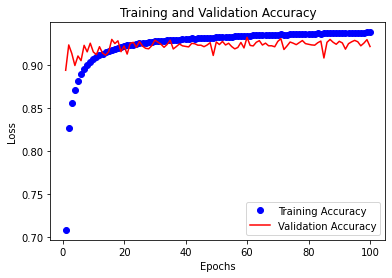

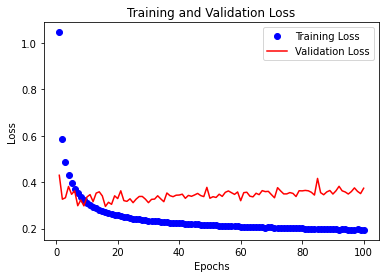

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/|Mcnnmodel_2x64x5,1000x100.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://7d9c3905-f60e-4fed-9ff3-0697f19f315b/assets


INFO:tensorflow:Assets written to: ram://7d9c3905-f60e-4fed-9ff3-0697f19f315b/assets


### 128

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(Domain_data['label'].nunique(), activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           7000      
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           64128     
                                                                 
 conv1d_1 (Conv1D)           (None, 42, 128)           82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 250)               32250     
                                                        

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,epochs=100, verbose=True,validation_data=(X_test, y_test),batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/100
1622/1622 [==============================] - 50s 23ms/step - loss: 0.9430 - accuracy: 0.7378 - val_loss: 0.3671 - val_accuracy: 0.9106
Epoch 2/100
1622/1622 [==============================] - 36s 22ms/step - loss: 0.4582 - accuracy: 0.8653 - val_loss: 0.3100 - val_accuracy: 0.9218
Epoch 3/100
1622/1622 [==============================] - 39s 24ms/step - loss: 0.3501 - accuracy: 0.8962 - val_loss: 0.2962 - val_accuracy: 0.9233
Epoch 4/100
1622/1622 [==============================] - 39s 24ms/step - loss: 0.2975 - accuracy: 0.9113 - val_loss: 0.2895 - val_accuracy: 0.9243
Epoch 5/100
1622/1622 [==============================] - 37s 23ms/step - loss: 0.2663 - accuracy: 0.9196 - val_loss: 0.3355 - val_accuracy: 0.9120
Epoch 6/100
1622/1622 [==============================] - 39s 24ms/step - loss: 0.2432 - accuracy: 0.9258 - val_loss: 0.3082 - val_accuracy: 0.9201
Epoch 7/100
1622/1622 [==============================] - 37s 23ms/step - loss: 0.2279 - accuracy: 0.9297 - val_loss: 0

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9702
Testing Accuracy:  0.9357


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 18.884981393814087 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00         5
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00     94137
           4       0.15      0.29      0.20       210
           5       0.53      0.54      0.54       197
           6       0.09      0.09      0.09        89
           7       0.00      0.00      0.00         1
           8       0.04      0.04      0.04       214
           9       0.04      0.04      0.04       151
          10       0.92      1.00      0.95       218
          11       0.93      0.93      0.93    100071
          12       0.89      0.98      0.93        94
          13       0.78      0.57      0.66        44
          14       0.33      0.26      0.29      5982
          15       0.03      0.04      0.03        51
          16       0.09      0.08      0.08        63
          17       0.99    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


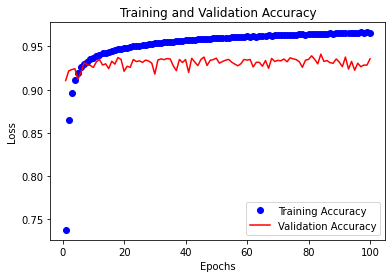

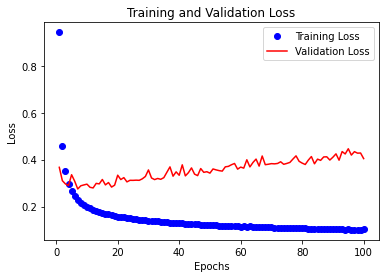

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/|Mcnnmodel_2x128x5,1000x100.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://bab68a8d-5864-437c-b9e4-586e97c57db1/assets


# before

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(57, activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           7000      
                                                                 
 conv1d (Conv1D)             (None, 48, 32)            9632      
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 32)            3104      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 250)               8250      
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=30,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/30
1638/1638 [==============================] - 27s 9ms/step - loss: 0.9989 - accuracy: 0.7392 - val_loss: 0.6686 - val_accuracy: 0.8184
Epoch 2/30
1638/1638 [==============================] - 16s 9ms/step - loss: 0.6075 - accuracy: 0.8360 - val_loss: 0.5719 - val_accuracy: 0.8462
Epoch 3/30
1638/1638 [==============================] - 15s 9ms/step - loss: 0.5481 - accuracy: 0.8515 - val_loss: 0.5328 - val_accuracy: 0.8547
Epoch 4/30
1638/1638 [==============================] - 17s 10ms/step - loss: 0.5158 - accuracy: 0.8596 - val_loss: 0.5089 - val_accuracy: 0.8602
Epoch 5/30
1638/1638 [==============================] - 15s 9ms/step - loss: 0.4931 - accuracy: 0.8653 - val_loss: 0.4983 - val_accuracy: 0.8632
Epoch 6/30
1638/1638 [==============================] - 15s 9ms/step - loss: 0.4748 - accuracy: 0.8701 - val_loss: 0.4713 - val_accuracy: 0.8709
Epoch 7/30
1638/1638 [==============================] - 15s 9ms/step - loss: 0.4613 - accuracy: 0.8738 - val_loss: 0.4688 - val_a

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.8977
Testing Accuracy:  0.8947


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 16.705811500549316 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2046
           1       1.00      1.00      1.00      2103
           2       1.00      1.00      1.00      2096
           3       1.00      1.00      1.00     93589
           4       0.59      0.30      0.40      2068
           5       1.00      1.00      1.00      2106
           6       1.00      1.00      1.00      2062
           7       0.82      0.65      0.73      1988
           8       0.73      0.27      0.39      2091
           9       1.00      1.00      1.00      2040
          10       0.47      0.01      0.02      2146
          11       0.74      0.13      0.23      2078
          12       1.00      0.99      0.99      2040
          13       0.82      0.94      0.88     74788
          14       0.99      0.93      0.96      1943
          15       0.98      0.92      0.95      2088
          16       0.00      0.00      0.00      6141
          17       0.75    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


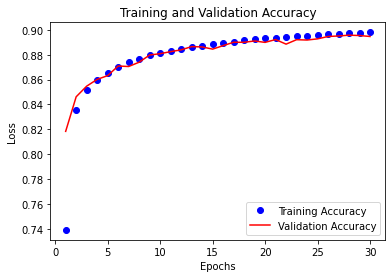

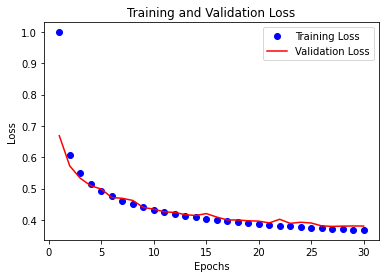

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Bcnnmodel_ftn32x3.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://28f1ea78-9e04-444e-ae23-e57ec0f5ee8c/assets


## 64x3,1000x50

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(64, 3, activation='relu'))
textcnnmodel.add(layers.Conv1D(64, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(57, activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_4 (Conv1D)           (None, 48, 64)            19264     
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 250)               16250     
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=50,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/50
1638/1638 [==============================] - 22s 13ms/step - loss: 0.8616 - accuracy: 0.7764 - val_loss: 0.5454 - val_accuracy: 0.8536
Epoch 2/50
1638/1638 [==============================] - 21s 13ms/step - loss: 0.4961 - accuracy: 0.8659 - val_loss: 0.4625 - val_accuracy: 0.8735
Epoch 3/50
1638/1638 [==============================] - 21s 13ms/step - loss: 0.4346 - accuracy: 0.8812 - val_loss: 0.4176 - val_accuracy: 0.8849
Epoch 4/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.3998 - accuracy: 0.8901 - val_loss: 0.3929 - val_accuracy: 0.8919
Epoch 5/50
1638/1638 [==============================] - 21s 13ms/step - loss: 0.3752 - accuracy: 0.8965 - val_loss: 0.3712 - val_accuracy: 0.8967
Epoch 6/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.3567 - accuracy: 0.9017 - val_loss: 0.3554 - val_accuracy: 0.9021
Epoch 7/50
1638/1638 [==============================] - 21s 13ms/step - loss: 0.3427 - accuracy: 0.9055 - val_loss: 0.3405 -

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9348
Testing Accuracy:  0.9282


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 16.94529104232788 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2046
           1       1.00      1.00      1.00      2103
           2       1.00      1.00      1.00      2096
           3       1.00      1.00      1.00     93589
           4       0.83      0.62      0.71      2068
           5       1.00      1.00      1.00      2106
           6       1.00      1.00      1.00      2062
           7       0.91      0.94      0.93      1988
           8       0.87      0.96      0.91      2091
           9       1.00      1.00      1.00      2040
          10       0.72      0.50      0.59      2146
          11       0.83      0.81      0.82      2078
          12       1.00      0.99      1.00      2040
          13       0.86      0.95      0.90     74788
          14       1.00      1.00      1.00      1943
          15       0.97      1.00      0.98      2088
          16       0.00      0.00      0.00      6141
          17       0.83    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


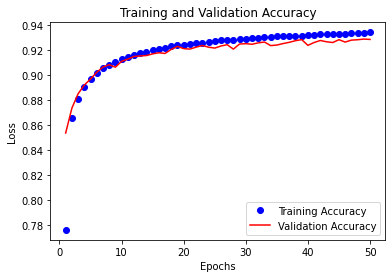

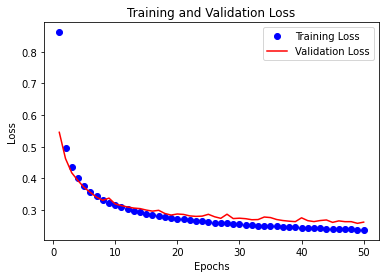

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Bcnnmodel_ftn64x3,1000x50.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://28f1ea78-9e04-444e-ae23-e57ec0f5ee8c/assets


## 128x3, 1000x50

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(128, 3, activation='relu'))
textcnnmodel.add(layers.Conv1D(128, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(57, activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           7000      
                                                                 
 conv1d (Conv1D)             (None, 48, 128)           38528     
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           49280     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 250)               32250     
                                                        

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=50,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/50
1638/1638 [==============================] - 40s 17ms/step - loss: 0.7585 - accuracy: 0.8025 - val_loss: 0.4595 - val_accuracy: 0.8755
Epoch 2/50
1638/1638 [==============================] - 27s 17ms/step - loss: 0.4073 - accuracy: 0.8895 - val_loss: 0.3697 - val_accuracy: 0.8980
Epoch 3/50
1638/1638 [==============================] - 27s 17ms/step - loss: 0.3380 - accuracy: 0.9074 - val_loss: 0.3272 - val_accuracy: 0.9116
Epoch 4/50
1638/1638 [==============================] - 28s 17ms/step - loss: 0.3009 - accuracy: 0.9168 - val_loss: 0.2966 - val_accuracy: 0.9188
Epoch 5/50
1638/1638 [==============================] - 28s 17ms/step - loss: 0.2778 - accuracy: 0.9228 - val_loss: 0.2827 - val_accuracy: 0.9231
Epoch 6/50
1638/1638 [==============================] - 28s 17ms/step - loss: 0.2604 - accuracy: 0.9272 - val_loss: 0.2710 - val_accuracy: 0.9257
Epoch 7/50
1638/1638 [==============================] - 28s 17ms/step - loss: 0.2477 - accuracy: 0.9305 - val_loss: 0.2580 -

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9555
Testing Accuracy:  0.9454


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 20.612472534179688 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2035
           2       1.00      1.00      1.00      2049
           3       1.00      1.00      1.00     93982
           4       0.94      0.94      0.94      2104
           5       1.00      1.00      1.00      2047
           6       1.00      1.00      1.00      2141
           7       0.94      1.00      0.97      2071
           8       0.97      0.93      0.95      2111
           9       1.00      1.00      1.00      1997
          10       0.90      0.86      0.88      2215
          11       0.95      0.90      0.92      2053
          12       1.00      0.99      1.00      2089
          13       0.89      0.95      0.92     74711
          14       1.00      1.00      1.00      2035
          15       0.99      0.99      0.99      2051
          16       0.36      0.02      0.03      6009
          17       0.96    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


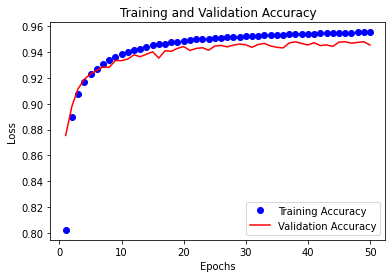

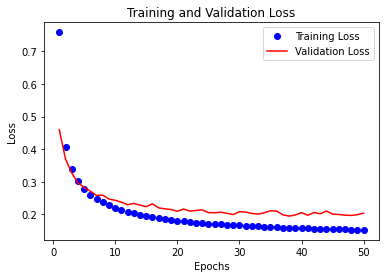

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Mcnnmodel_128x3,1000x50.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://7bf7e88f-c8ef-41a8-8275-aabd57ec3556/assets


## 128x5, 1000x50

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(57, activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_4 (Conv1D)           (None, 46, 128)           64128     
                                                                 
 conv1d_5 (Conv1D)           (None, 42, 128)           82048     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 250)               32250     
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=50,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/50
1638/1638 [==============================] - 38s 23ms/step - loss: 0.7112 - accuracy: 0.8163 - val_loss: 0.4294 - val_accuracy: 0.8832
Epoch 2/50
1638/1638 [==============================] - 36s 22ms/step - loss: 0.3640 - accuracy: 0.8985 - val_loss: 0.3199 - val_accuracy: 0.9099
Epoch 3/50
1638/1638 [==============================] - 39s 24ms/step - loss: 0.2949 - accuracy: 0.9164 - val_loss: 0.2832 - val_accuracy: 0.9195
Epoch 4/50
1638/1638 [==============================] - 37s 23ms/step - loss: 0.2588 - accuracy: 0.9262 - val_loss: 0.2583 - val_accuracy: 0.9259
Epoch 5/50
1638/1638 [==============================] - 37s 23ms/step - loss: 0.2355 - accuracy: 0.9322 - val_loss: 0.2454 - val_accuracy: 0.9295
Epoch 6/50
1638/1638 [==============================] - 39s 24ms/step - loss: 0.2198 - accuracy: 0.9365 - val_loss: 0.2284 - val_accuracy: 0.9367
Epoch 7/50
1638/1638 [==============================] - 38s 23ms/step - loss: 0.2057 - accuracy: 0.9404 - val_loss: 0.2196 -

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9658
Testing Accuracy:  0.9521


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 19.365004301071167 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2035
           2       1.00      1.00      1.00      2049
           3       1.00      1.00      1.00     93982
           4       0.95      0.88      0.92      2104
           5       1.00      1.00      1.00      2047
           6       1.00      1.00      1.00      2141
           7       0.96      0.98      0.97      2071
           8       0.95      0.99      0.97      2111
           9       1.00      1.00      1.00      1997
          10       0.94      0.93      0.94      2215
          11       0.96      0.93      0.95      2053
          12       0.99      1.00      1.00      2089
          13       0.92      0.96      0.94     74711
          14       1.00      1.00      1.00      2035
          15       0.99      1.00      1.00      2051
          16       0.49      0.35      0.41      6009
          17       0.97    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


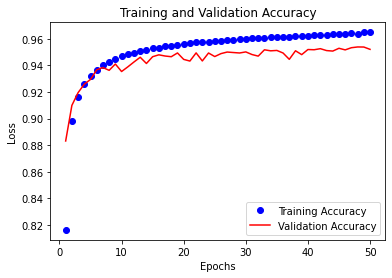

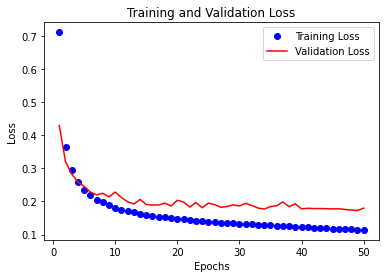

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Mcnnmodel_128x5,1000x50.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://05905682-3fbc-4a24-ac23-e580097ec094/assets


## 128x5, 1000x100

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len=50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())

textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(57, activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_6 (Conv1D)           (None, 46, 128)           64128     
                                                                 
 conv1d_7 (Conv1D)           (None, 42, 128)           82048     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               32250     
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=100,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("CNN took {} milliseconds to train Multiclass data.\n".format(end-start))

Epoch 1/100
1638/1638 [==============================] - 37s 22ms/step - loss: 0.6991 - accuracy: 0.8187 - val_loss: 0.4116 - val_accuracy: 0.8859
Epoch 2/100
1638/1638 [==============================] - 36s 22ms/step - loss: 0.3591 - accuracy: 0.8995 - val_loss: 0.3245 - val_accuracy: 0.9093
Epoch 3/100
1638/1638 [==============================] - 36s 22ms/step - loss: 0.2885 - accuracy: 0.9179 - val_loss: 0.2902 - val_accuracy: 0.9188
Epoch 4/100
1638/1638 [==============================] - 37s 23ms/step - loss: 0.2524 - accuracy: 0.9275 - val_loss: 0.2486 - val_accuracy: 0.9281
Epoch 5/100
1638/1638 [==============================] - 37s 23ms/step - loss: 0.2298 - accuracy: 0.9338 - val_loss: 0.2453 - val_accuracy: 0.9297
Epoch 6/100
1638/1638 [==============================] - 39s 24ms/step - loss: 0.2127 - accuracy: 0.9383 - val_loss: 0.2205 - val_accuracy: 0.9364
Epoch 7/100
1638/1638 [==============================] - 37s 23ms/step - loss: 0.2002 - accuracy: 0.9418 - val_loss: 0

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9703
Testing Accuracy:  0.9496


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 18.27788496017456 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2035
           2       1.00      1.00      1.00      2049
           3       1.00      1.00      1.00     93982
           4       0.88      1.00      0.94      2104
           5       1.00      1.00      1.00      2047
           6       1.00      1.00      1.00      2141
           7       0.96      0.98      0.97      2071
           8       0.96      0.99      0.97      2111
           9       1.00      1.00      1.00      1997
          10       0.89      0.98      0.93      2215
          11       0.91      0.99      0.95      2053
          12       1.00      1.00      1.00      2089
          13       0.92      0.94      0.93     74711
          14       1.00      0.99      0.99      2035
          15       0.99      1.00      1.00      2051
          16       0.51      0.29      0.37      6009
          17       0.97    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


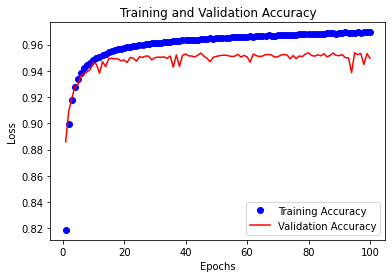

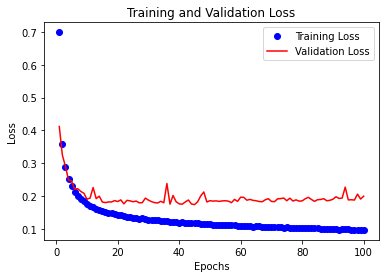

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Mcnnmodel_128x5,1000x100.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://4fa0dfbc-34b1-4bf4-a1bd-1f80ac2c9865/assets
